In [1]:
# https://clipc-services.ceda.ac.uk/dreq/index.html
import xarray as xr
import cftime
from datetime import datetime

import numpy as np
import pandas as pd

# xr.set_options(enable_cftimeindex=True)
## Check here for issues with cftime:
# https://xarray.pydata.org/en/stable/user-guide/time-series.html#non-standard-calendars-and-dates-outside-the-timestamp-valid-range

- historical: CMIP data from 1850-2014
- ssp126: SSP-based RCP scenario with low radiative forcing by the end of the century. Following approximately RCP2.6 global forcing pathway with SSP1 socioeconomic conditions. Radiative forcing reaches a level of 2.6 W/m2 in 2100. Concentration-driven.
- ssp245: SSP-based RCP scenario with medium radiative forcing by the end of the century. Following approximately RCP4.5 global forcing pathway with SSP2 socioeconomic conditions. Radiative forcing reaches a level of 4.5 W/m2 in 2100. Concentration-driven.
- ssp370: Gap: Baseline scenario with a medium to high radiative forcing by the end of century. Following approximately RCP7.0 global forcing pathway with SSP3 socioeconomic conditions. Radiative forcing reaches a level of 7.0 W/m2 in 2100. Concentration-driven.
- ssp585: SSP-based RCP scenario with high radiative forcing by the end of century. Following approximately RCP8.5 global forcing pathway with SSP5 socioeconomic conditions. Concentration-driven

[Link to CMIP variables](https://clipc-services.ceda.ac.uk/dreq/index/var.html)

- 'huss': Near-Surface Specific Humidity
- 'hurs': Near-Surface Relative Humidity \[\%\]
- 'pr': Precipitation \[kg m-2 s-1\]
- 'tas': Near-Surface Air Temperature \[K\]
- 'tasmin': Daily Minimum Near-Surface Air Temperature \[K\]
- 'tasmax': Daily Maximum Near-Surface Air Temperature \[K\]

In [2]:
hist = xr.open_zarr('cmip_data/historical.zarr') # use_cftime=None by default, loads as cftime
sp1 = xr.open_zarr('cmip_data/ssp126.zarr')
sp2 = xr.open_zarr('cmip_data/ssp245.zarr')
sp3 = xr.open_zarr('cmip_data/ssp370.zarr')
sp5 = xr.open_zarr('cmip_data/ssp585.zarr')

hist

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    hurs       (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
    huss       (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    table_id:               Amon
    tracking_id:            hdl:21.14100/56114e92-8200-4e9f-b9d0-48580aeb8395...
    variable_id:            hurs
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    version_id:             v20190514

In [3]:
hist['time'].values

array([cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 15, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)

In [4]:
xr.CFTimeIndex(hist['time'].values).to_datetimeindex()

/home/jovyan/envs/invlyr/lib/python3.10/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_1768/1858116614.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  xr.CFTimeIndex(hist['time'].values).to_datetimeindex()


DatetimeIndex(['1850-01-15 12:00:00', '1850-02-14 00:00:00',
               '1850-03-15 12:00:00', '1850-04-15 00:00:00',
               '1850-05-15 12:00:00', '1850-06-15 00:00:00',
               '1850-07-15 12:00:00', '1850-08-15 12:00:00',
               '1850-09-15 00:00:00', '1850-10-15 12:00:00',
               ...
               '2014-03-15 12:00:00', '2014-04-15 00:00:00',
               '2014-05-15 12:00:00', '2014-06-15 00:00:00',
               '2014-07-15 12:00:00', '2014-08-15 12:00:00',
               '2014-09-15 00:00:00', '2014-10-15 12:00:00',
               '2014-11-15 00:00:00', '2014-12-15 12:00:00'],
              dtype='datetime64[ns]', length=1980, freq=None)

In [5]:
def clean_time(ds, warn=True):
    """
    https://pypi.org/project/cftime/
    https://xarray.pydata.org/en/stable/generated/xarray.CFTimeIndex.to_datetimeindex.html#xarray.CFTimeIndex.to_datetimeindex
    """
    ds = ds.reindex({
        'time': [datetime(dt.year, dt.month, 15) for dt in ds['time'].values],
        # xr.CFTimeIndex(ds['time'].values),
        # [datetime(dt.year, dt.month, 15) for dt in ds['time'].values],
        # xr.CFTimeIndex(ds['time'].values).to_datetimeindex(unsafe=warn),
        'lat': ds['lat'].values,
        'lon': ds['lon'].values,
    })
    return ds

hist_c = clean_time(hist)
sp1_c = clean_time(sp1)
sp2_c = clean_time(sp2)
sp3_c = clean_time(sp3)
sp5_c = clean_time(sp5)

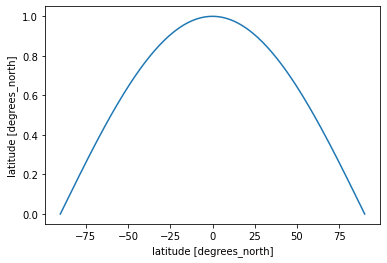

In [6]:
# Weight data relative to curvature of the earth
## each xr ds has same n_lat, so this will be the same for all of them

weights = np.cos(np.deg2rad(hist['lat']))
weights.name = 'weights'
weights.plot();

In [7]:
hist_w = hist_c.weighted(weights)
sp1_w = sp1_c.weighted(weights)
sp2_w = sp2_c.weighted(weights)
sp3_w = sp3_c.weighted(weights)
sp5_w = sp5_c.weighted(weights)

In [19]:
hist_c['time'].values

array(['1850-01-15T00:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-15T00:00:00.000000000', ...,
       '2014-10-15T00:00:00.000000000', '2014-11-15T00:00:00.000000000',
       '2014-12-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
hist_c['time'].dt.year

<xarray.DataArray 'year' (time: 1980)>
array([1850, 1850, 1850, ..., 2014, 2014, 2014])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-15 1850-02-15 ... 2014-12-15

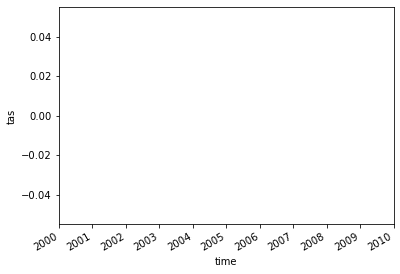

In [16]:
# hist_c.mean((hist_c.time.dt.year, 'lat', 'lon'))['tas'].plot();
hist_c.mean(('lat', 'lon'))['tas'].plot();

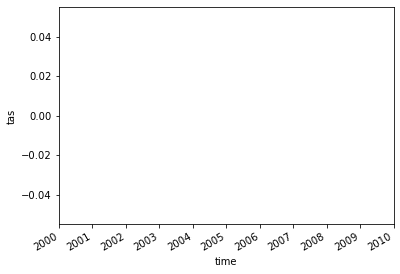

In [10]:
hist_w.mean(('lat', 'lon'))['tas'].plot();

In [11]:
h2 = hist_c.expand_dims({'year': hist_c['time'].dt.year,
                   'month': hist_c['time'].dt.month})

In [12]:
h2.mean(('year', 'month'))['pr']#.plot(x='lon', y='lat')

<xarray.DataArray 'pr' (time: 1980, lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(1980, 192, 288), dtype=float32, chunksize=(1980, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-15 1850-02-15 ... 2014-12-15
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [13]:
h2.time.dt.month

<xarray.DataArray 'month' (time: 1980)>
array([ 1,  2,  3, ..., 10, 11, 12])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-15 1850-02-15 ... 2014-12-15

In [14]:
h2.mean('time.year')

ValueError: Dataset does not contain the dimensions: ['time.year']

In [20]:
d = xr.Dataset({'var': (['time'], np.random.randn(1980))},
               coords={'time': [datetime(dt.year, dt.month, 15) for dt in h2['time'].values]})

AttributeError: 'numpy.datetime64' object has no attribute 'year'

In [ ]:
d

In [ ]:
d['var'].plot()

In [23]:
hist

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    hurs       (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
    huss       (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    table_id:               Amon
    tracking_id:            hdl:21.14100/56114e92-8200-4e9f-b9d0-48580aeb8395...
    variable_id:            hurs
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    version_id:             v20190514

In [ ]:
hist['hurs'].values.shape

In [30]:
hist = xr.open_zarr('cmip_data/historical.zarr') # use_cftime=None by default, loads as cftime

cols = ['hurs', 'huss', 'pr', 'tas']

hist2 = xr.Dataset(
    data_vars = {k: (['time', 'lat', 'lon'], hist[k].values) for k in cols},
    coords = {
        'time': [datetime(dt.year, dt.month, 15) for dt in hist['time'].values],
        'lat': hist['lat'].values,
        'lon': hist['lon'].values,
    }
)

hist2

<xarray.Dataset>
Dimensions:  (time: 1980, lat: 192, lon: 288)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-15 1850-02-15 ... 2014-12-15
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    hurs     (time, lat, lon) float32 95.15 95.15 95.15 ... 104.3 104.3 104.3
    huss     (time, lat, lon) float32 0.0003189 0.0003189 ... 0.000763 0.0007632
    pr       (time, lat, lon) float32 9.252e-07 9.252e-07 ... 5.957e-06
    tas      (time, lat, lon) float32 242.1 242.1 242.1 ... 252.9 252.9 252.9

In [32]:
hist2.mean(('lat', 'lon', 'time.month'))['pr'].plot()

ValueError: Dataset does not contain the dimensions: ['time.month']